The goal of this project is to build a machine learning model that can predict the medical insurance costs for individuals based on several attributes.

In [387]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


import joblib
import pickle


In [103]:
# read the dataset
medical=pd.read_csv('Train_Data.csv')

In [105]:
# checking the columns in the dataset
medical.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children', 'charges'], dtype='object')

In [107]:
# first 5 of the data
medical.head(5)

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [109]:
# last 5 of the data
medical.tail(5)

,age,sex,bmi,smoker,region,children,charges
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452
3629,37.598865,female,25.219233,no,northeast,3,7027.698968


EDA

In [112]:
# checking the dimension of the dataset
medical.shape

(3630, 7)

In [114]:
# checking the statistical info of the dataset
round(medical.describe(),2)

,age,bmi,children,charges
count,3630.00,3630.00,3630.00,3630.00
mean,38.89,30.63,2.50,12784.81
std,12.15,5.44,1.71,10746.17
min,18.00,15.96,0.00,1121.87
25%,29.00,26.69,1.00,5654.82
50%,39.17,30.20,3.00,9443.81
75%,48.34,34.10,4.00,14680.41
max,64.00,53.13,5.00,63770.43


In [116]:
# checking the data type of the columns
medical.dtypes

age         float64
sex          object
bmi         float64
smoker       object
region       object
children      int64
charges     float64
dtype: object

In [118]:
# now checking the null value in the dataset
medical.isna().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [120]:
# checking the duplicated value in the dataset
medical.duplicated().sum()

679

In [122]:
# droping the duplicated value
medical.drop_duplicates(inplace=True)

In [124]:
# checking back the duplicated value
medical.duplicated().sum()

0

In [126]:
# checking the dimension of the dataset
medical.shape

(2951, 7)

In [128]:
# checking the unique value of each column
medical['sex'].unique()  


array(['male', 'female'], dtype=object)

In [130]:
medical['smoker'].unique()

array(['no', 'yes'], dtype=object)

In [132]:
medical['region'].unique()

array(['northeast', 'southeast', 'northwest', 'southwest'], dtype=object)

In [134]:
# checking the value count of some columns
medical['sex'].value_counts()

sex
male      1646
female    1305
Name: count, dtype: int64

In [136]:
medical['region'].value_counts()

region
southeast    824
northwest    734
northeast    699
southwest    694
Name: count, dtype: int64

In [138]:
medical['smoker'].value_counts()

smoker
no     2490
yes     461
Name: count, dtype: int64

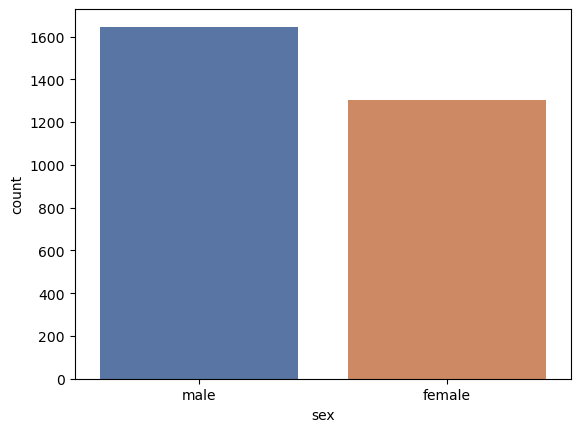

In [140]:
#visualizing  the number of people
sns.countplot(data=medical,x='sex',palette='deep')
plt.show()


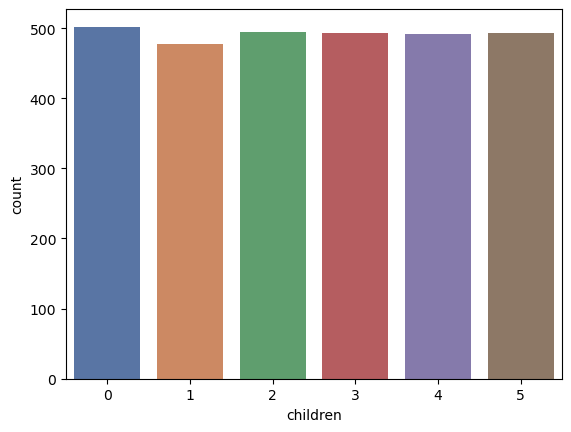

In [142]:
#visualizing  the number of children
sns.countplot(data=medical,x='children',palette='deep')
plt.show()

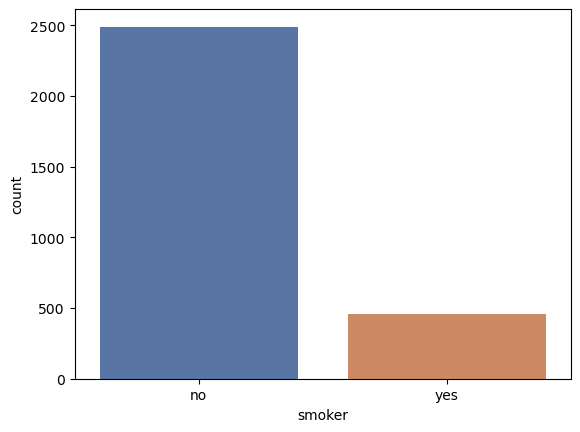

In [144]:
#visualizing  the number of smokers
sns.countplot(data=medical,x='smoker',palette='deep')
plt.show()

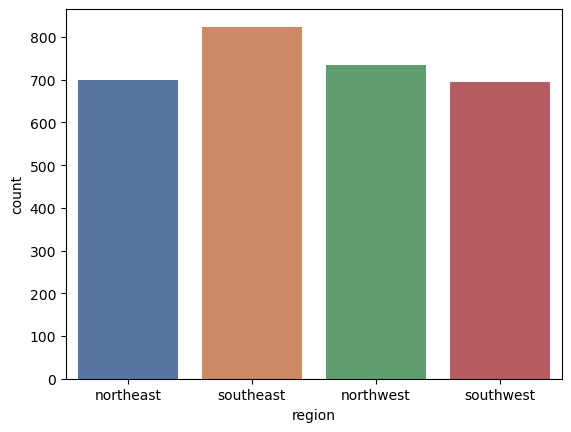

In [146]:
#visualizing  the number of region
sns.countplot(data=medical,x='region',palette='deep')
plt.show()

In [147]:
# checking the min and max of the quality rate
print('Min charges taken from insurance:', medical['charges'].min())
print('Max charges taken from insurance:', medical['charges'].max())


Min charges taken from insurance: 1121.8739
Max charges taken from insurance: 63770.42801


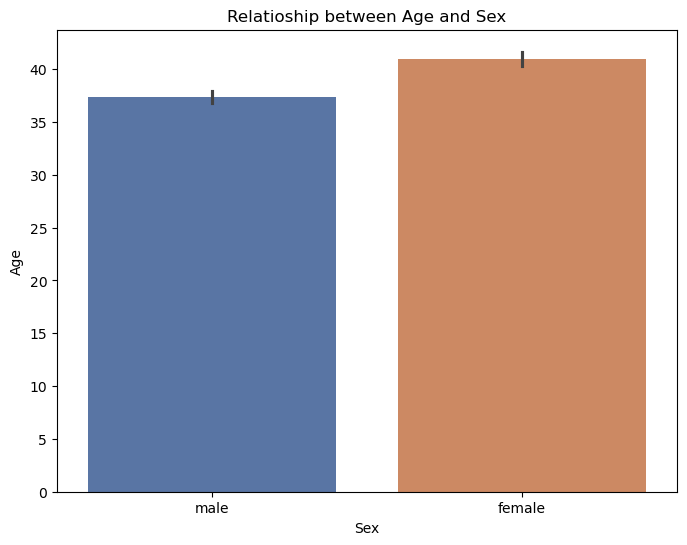

In [150]:
# ploting a bar chart of the age and sex variable
plt.figure(figsize=(8,6))
sns.barplot(x='sex',y='age',data=medical,palette='deep')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Relatioship between Age and Sex')
plt.show()

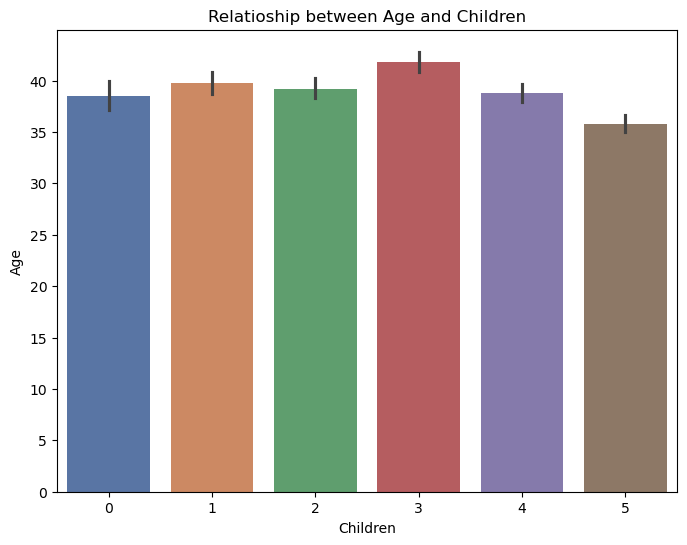

In [151]:
# ploting a bar chart of the age and children variable
plt.figure(figsize=(8,6))
sns.barplot(x='children',y='age',data=medical,palette='deep')
plt.xlabel('Children')
plt.ylabel('Age')
plt.title('Relatioship between Age and Children')
plt.show()

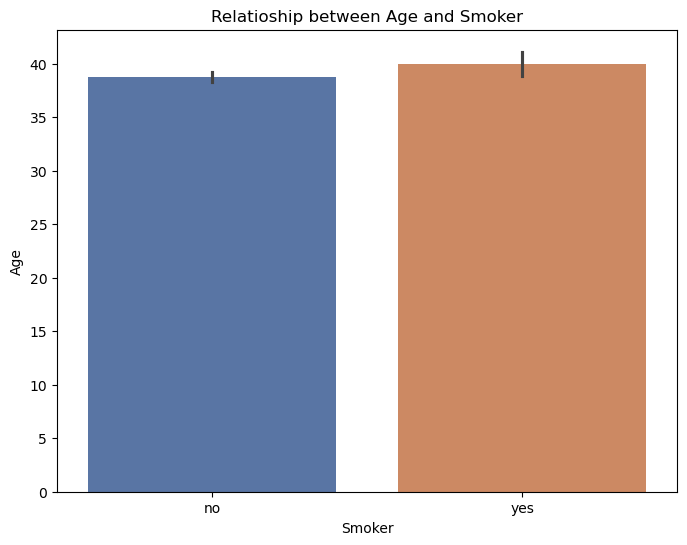

In [153]:
# ploting a bar chart of the age and smoker variable
plt.figure(figsize=(8,6))
sns.barplot(x='smoker',y='age',data=medical,palette='deep')
plt.xlabel('Smoker')
plt.ylabel('Age')
plt.title('Relatioship between Age and Smoker')
plt.show()

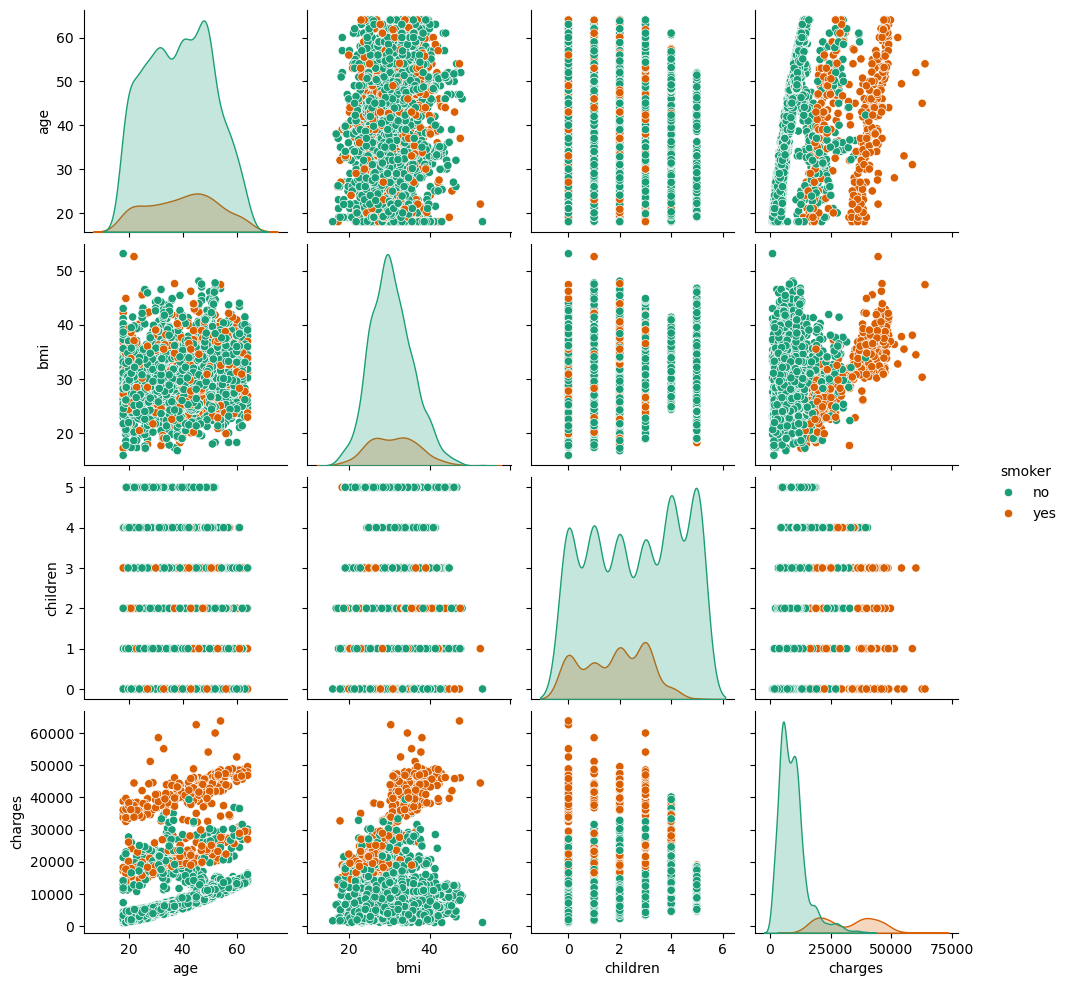

In [155]:
# multivariate analysis
sns.pairplot(medical,hue='smoker',palette='Dark2')
plt.show()

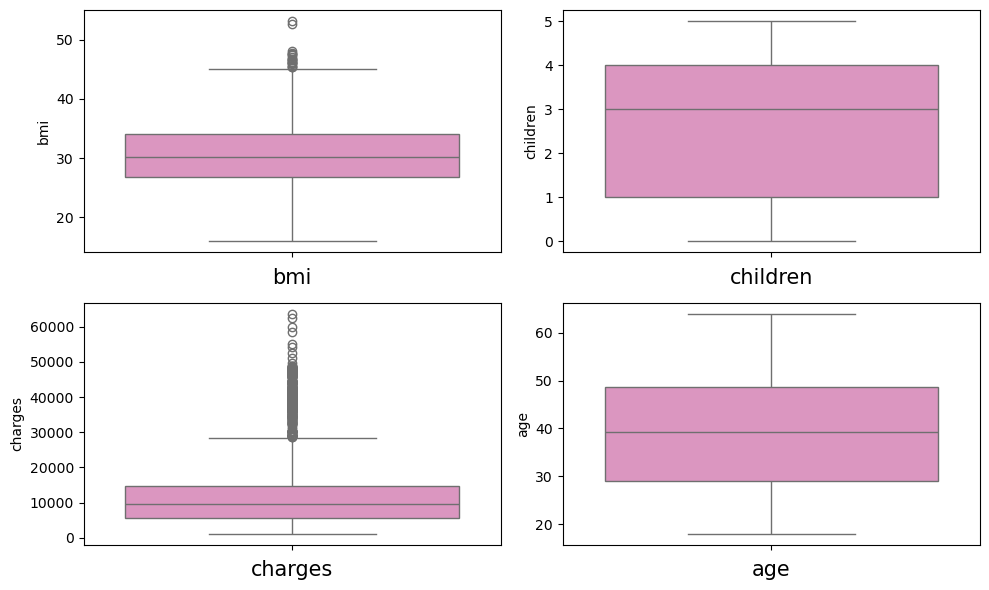

In [164]:
# checkin for outlier by visualizing using boxplot

numerical = ['bmi', 'children', 'charges', 'age']

plt.figure(figsize=(10, 6), facecolor='white')
plotnumber = 1

for col in numerical:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(y=medical[col], palette='Set2_r', ax=ax)
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [166]:
# Using IQR( Interquartile Range)

# calculate IQR
Q1=medical['bmi'].quantile(0.25)
Q3=medical['bmi'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1 -1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

# identify outlier
outliers=medical.loc[(medical['bmi'] < lower_bound) | (medical['bmi'] > upper_bound)]

# remove outliers
medicals=medical.loc[(medical['bmi'] >= lower_bound) & (medical['bmi'] <= upper_bound)]




In [188]:
# Encoding categorical columns using ordinal encoder


OE = OrdinalEncoder()

# Iterate through each column in the DataFrame
for i in medicals.columns:
    if medicals[i].dtype == 'object':  
        
        medicals[i] = OE.fit_transform(medicals[i].values.reshape(-1, 1))

medicals

,age,sex,bmi,smoker,region,children,charges
0,21.000000,1.0,25.745000,0.0,0.0,2,3279.868550
1,36.976978,0.0,25.744165,1.0,2.0,3,21454.494239
2,18.000000,1.0,30.030000,0.0,2.0,1,1720.353700
3,37.000000,1.0,30.676891,0.0,0.0,3,6801.437542
4,58.000000,1.0,32.010000,0.0,2.0,1,11946.625900
...,...,...,...,...,...,...,...
2947,43.000000,1.0,35.531966,1.0,2.0,2,18989.365540
2948,31.374148,1.0,28.278549,0.0,0.0,4,21806.181609
2949,50.370750,0.0,26.766297,0.0,1.0,4,11355.817586
2950,49.201678,0.0,31.396840,0.0,1.0,4,11185.914056


In [190]:
# checking for skewness
medicals.skew()

age         0.042713
sex        -0.233003
bmi         0.203643
smoker      1.901466
region     -0.028541
children   -0.011204
charges     1.748048
dtype: float64

In [194]:
# removing skewness

# now reducing the charges column skewness using log
charges_skewness=medicals['charges'].skew()

# Apply Log transformation to charges
medicals['log_charges']=np.log1p(medicals['charges'])

# calculate skewness of transformed log_charges
log_charges_skewness=medicals['log_charges'].skew()

In [200]:
medicals.skew()

age            0.042713
sex           -0.233003
bmi            0.203643
smoker         1.901466
region        -0.028541
children      -0.011204
charges        1.748048
log_charges    0.038032
dtype: float64

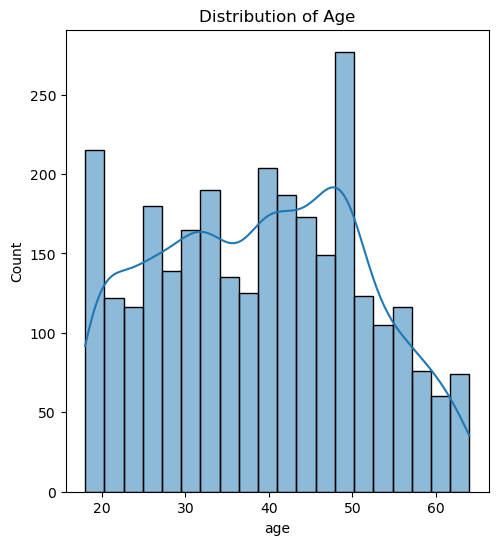

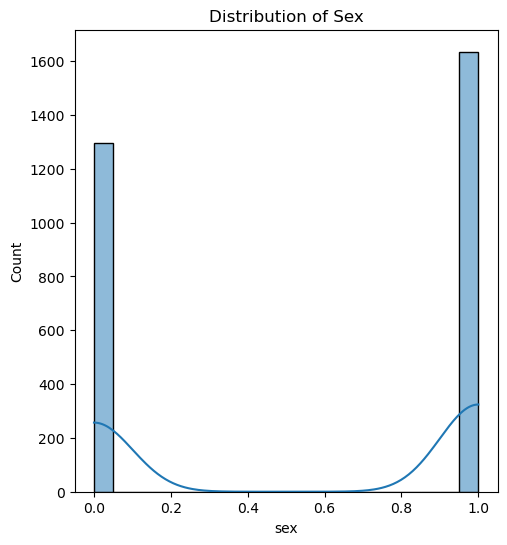

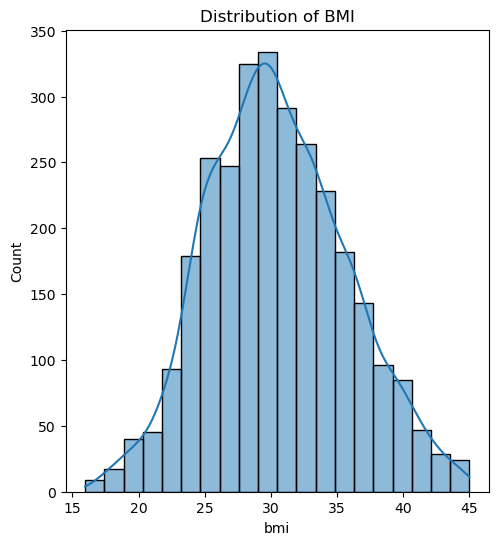

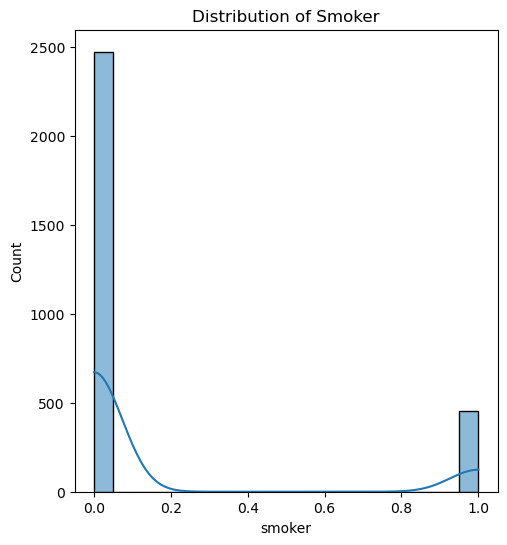

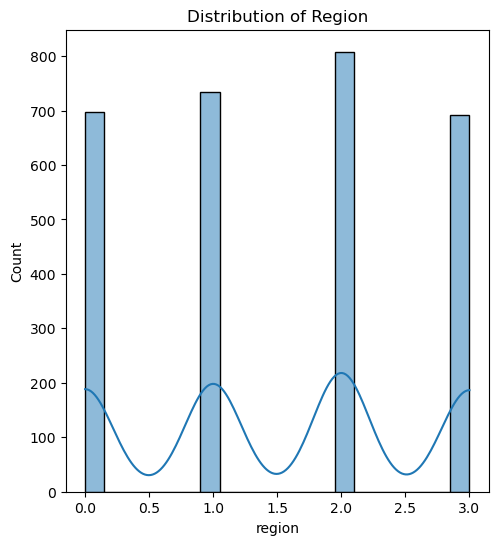

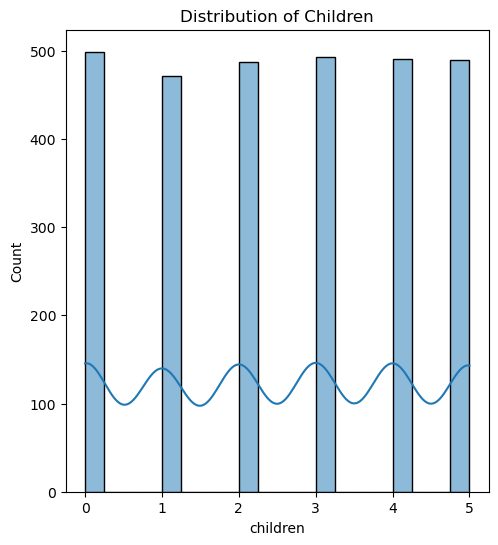

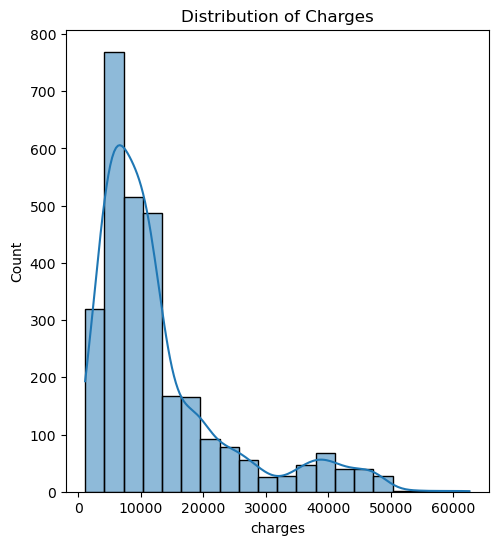

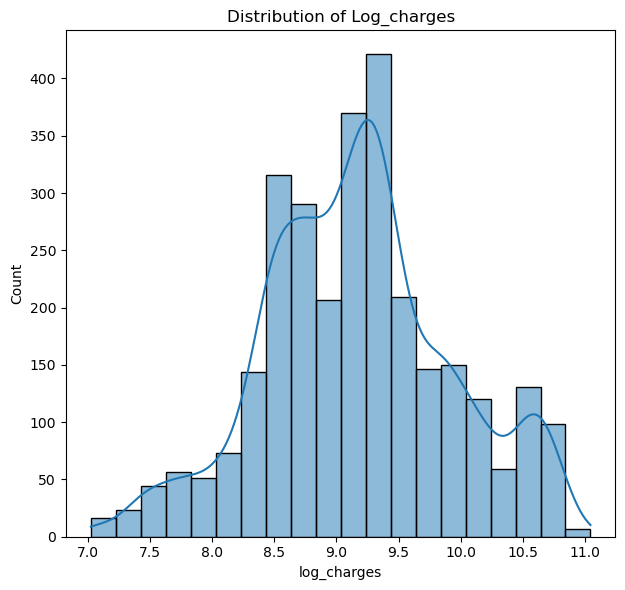

In [208]:
# visualization of distribution of all columns

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(medicals['age'],bins=20,kde=True)
plt.title('Distribution of Age')


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(medicals['sex'],bins=20,kde=True)
plt.title('Distribution of Sex')


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(medicals['bmi'],bins=20,kde=True)
plt.title('Distribution of BMI')


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(medicals['smoker'],bins=20,kde=True)
plt.title('Distribution of Smoker')


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(medicals['region'],bins=20,kde=True)
plt.title('Distribution of Region')


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(medicals['children'],bins=20,kde=True)
plt.title('Distribution of Children')


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(medicals['charges'],bins=20,kde=True)
plt.title('Distribution of Charges')


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(medicals['log_charges'],bins=20,kde=True)
plt.title('Distribution of Log_charges')


plt.tight_layout()
plt.show()

In [210]:
# showing the statisstical description of the dataset
medicals.describe()

,age,sex,bmi,smoker,region,children,charges,log_charges
count,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000
mean,38.958618,0.557830,30.501585,0.155578,1.509041,2.503582,12811.100251,9.168026
std,12.193889,0.496729,5.251386,0.362517,1.094590,1.712304,10684.904568,0.762709
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,7.023647
25%,29.000000,0.000000,26.697360,0.000000,1.000000,1.000000,5684.501572,8.645671
50%,39.204267,1.000000,30.185901,0.000000,2.000000,3.000000,9520.001779,9.161255
75%,48.524985,1.000000,33.982578,0.000000,2.000000,4.000000,14831.372859,9.604567
max,64.000000,1.000000,45.030890,1.000000,3.000000,5.000000,62592.873090,11.044423


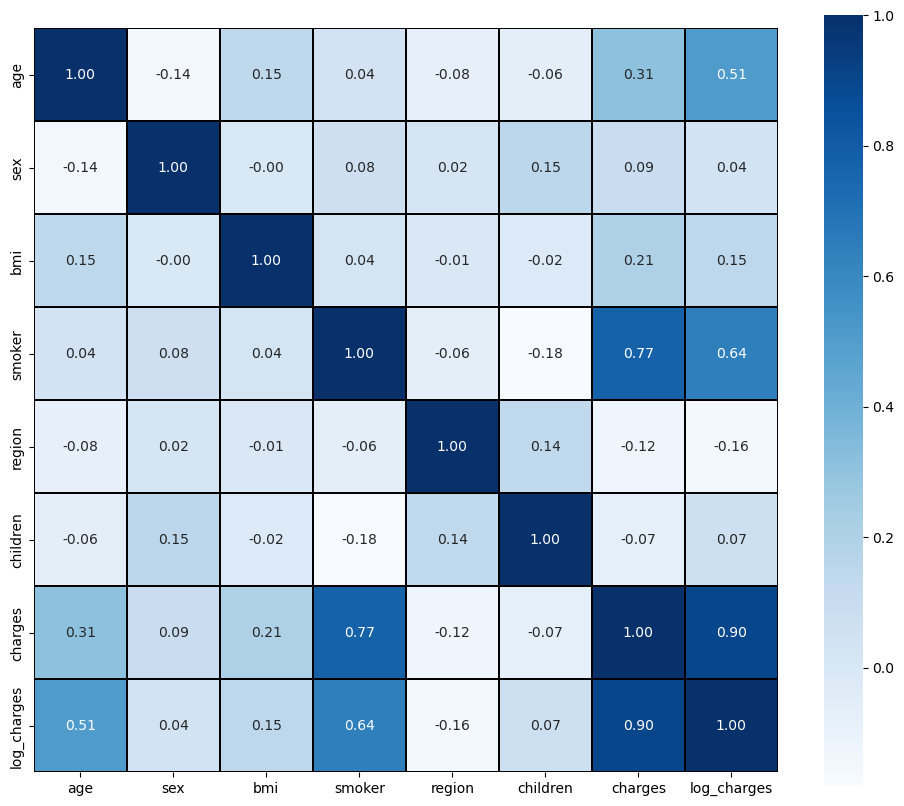

In [216]:
# visualize the corr
plt.figure(figsize=(12,10))
sns.heatmap(medicals.corr(),annot=True,cmap='Blues',linewidths=0.1,linecolor='black',fmt='.2f',square=True)
plt.show()

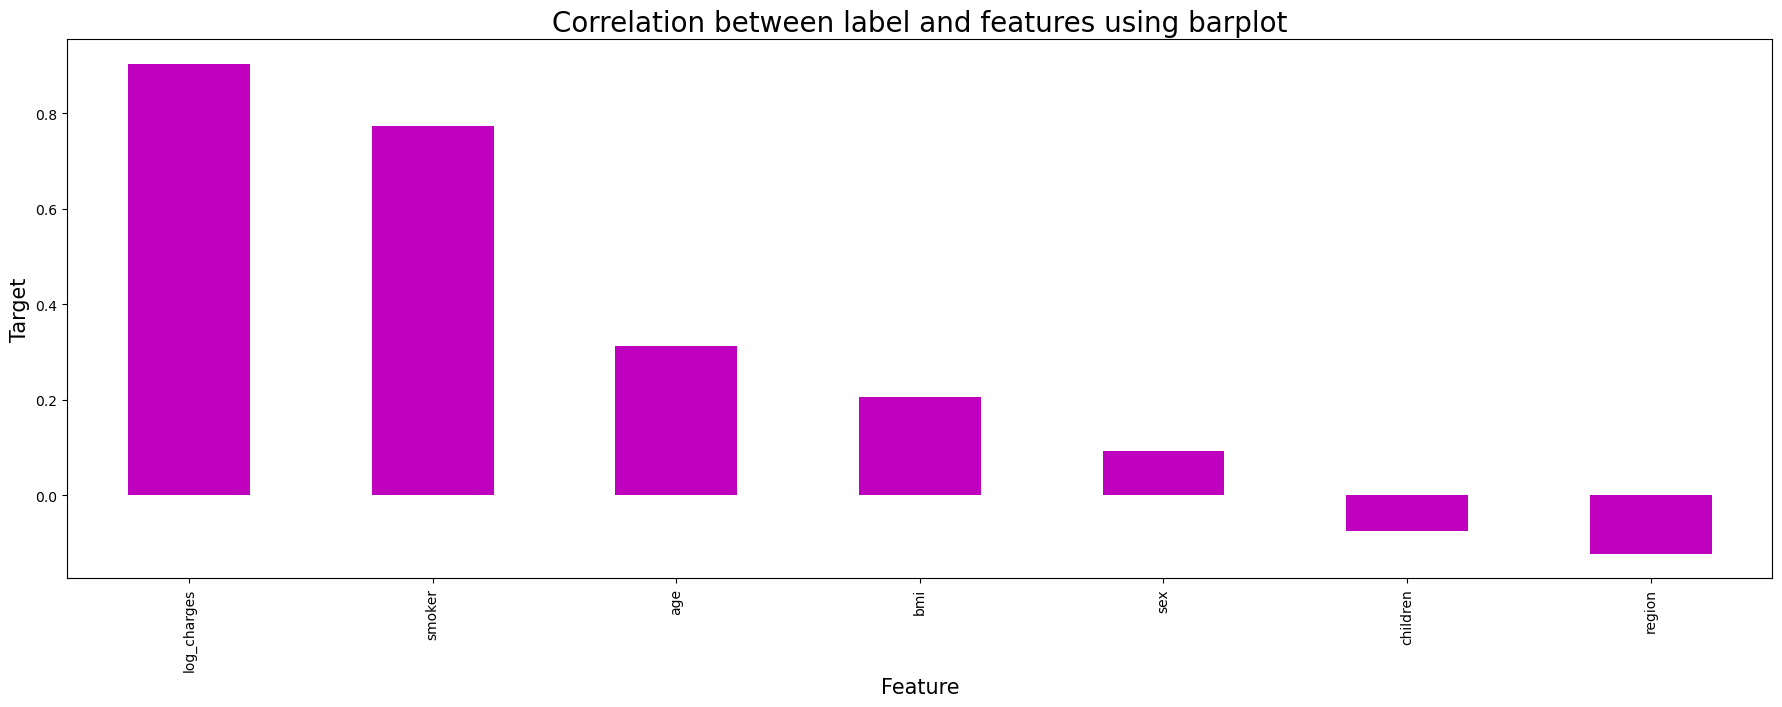

In [218]:
# correaltion between label and feature

plt.figure(figsize=(22,7))
medicals.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between label and features using barplot', fontsize=20)
plt.show()

In [220]:
# split the variables into predictior and target
X=medicals.drop(columns=['charges','log_charges'],axis=1)
y=medicals['log_charges']

In [305]:
# spliting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [308]:
# standardize the prediction variable
scaled=StandardScaler()

X_train_scaled=scaled.fit_transform(X_train)
X_test_scaled=scaled.transform(X_test)

Linear Regression

In [311]:
# initializing,fit,predict and evaluate of the linear regression
LR = LinearRegression()
LR.fit(X_train_scaled,y_train)
pred_LR=LR.predict(X_test_scaled)
pred_train=LR.predict(X_train_scaled)

print(LR)
print('R2_score: ', r2_score(y_test,pred_LR)*100)
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_LR))
print('Mean Square Error: ', mean_squared_error(y_test,pred_LR))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,pred_LR)))



LinearRegression()
R2_score:  71.02165364917387
R2_score on training data:  71.44079738798432
Mean Absolute Error:  0.26809496237367647
Mean Square Error:  0.17131087760428934
Root Mean Square Error: 0.4138971824068018


RandomForestRegressor

In [313]:
# initializing,fit,predict and evaluate of the random foreat
RFR = RandomForestRegressor()
RFR.fit(X_train_scaled,y_train)
pred_RFR=RFR.predict(X_test_scaled)
pred_train=RFR.predict(X_train_scaled)

print(RFR)
print('R2_score: ', r2_score(y_test,pred_RFR)*100)
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_RFR))
print('Mean Square Error: ', mean_squared_error(y_test,pred_RFR))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,pred_RFR)))

RandomForestRegressor()
R2_score:  84.21827813191909
R2_score on training data:  97.5656638246806
Mean Absolute Error:  0.12733004663431524
Mean Square Error:  0.0932965805086621
Root Mean Square Error: 0.3054448894787112


KNeighborsRegressor

In [315]:
# initializing,fit,predict and evaluate of the kneighbors regressor
KNR = KNN()
KNR.fit(X_train_scaled,y_train)
pred_KNR=KNR.predict(X_test_scaled)
pred_train=KNR.predict(X_train_scaled)

print(KNR)
print('R2_score: ', r2_score(y_test,pred_KNR)*100)
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_KNR))
print('Mean Square Error: ', mean_squared_error(y_test,pred_KNR))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,pred_KNR)))

KNeighborsRegressor()
R2_score:  81.00553231090565
R2_score on training data:  89.11577415656024
Mean Absolute Error:  0.16001667036654227
Mean Square Error:  0.11228932424407667
Root Mean Square Error: 0.33509599258134476


Gradient Booster

In [317]:
# initializing,fit,predict and evaluate of the gredient booster
GB = GradientBoostingRegressor()
GB.fit(X_train_scaled,y_train)
pred_GB=GB.predict(X_test_scaled)
pred_train=GB.predict(X_train_scaled)

print(GB)
print('R2_score: ', r2_score(y_test,pred_GB)*100)
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_GB))
print('Mean Square Error: ', mean_squared_error(y_test,pred_GB))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,pred_GB)))

GradientBoostingRegressor()
R2_score:  84.36369633806193
R2_score on training data:  87.91484327858261
Mean Absolute Error:  0.1568830294919918
Mean Square Error:  0.09243691376949156
Root Mean Square Error: 0.30403439570136065


SVR

In [319]:
# initializing,fit,predict and evaluate of the support vector
SV = SVR()
SV.fit(X_train_scaled,y_train)
pred_SV=SV.predict(X_test_scaled)
pred_train=SV.predict(X_train_scaled)

print(SV)
print('R2_score: ', r2_score(y_test,pred_SV)*100)
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_SV))
print('Mean Square Error: ', mean_squared_error(y_test,pred_SV))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,pred_SV)))

SVR()
R2_score:  81.3921562873006
R2_score on training data:  83.81354835842689
Mean Absolute Error:  0.14907640910838454
Mean Square Error:  0.11000372478656344
Root Mean Square Error: 0.3316680943150297


Checking cross validation score

In [321]:
# linear regression
score=cross_val_score(LR,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and Cross val score: ',(r2_score(y_test,pred_LR)-score.mean())*100)

[0.7117571  0.71660511 0.72574042 0.73131489 0.66544552]
0.7101726073989418
Difference between R2 score and Cross val score:  0.004392909279693491


In [323]:
# random forest
score1=cross_val_score(RFR,X,y,cv=5)
print(score1)
print(score1.mean())
print('Difference between R2 score and Cross val score: ',(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.87555968 0.86141526 0.84651504 0.8463238  0.80524536]
0.8470118256870652
Difference between R2 score and Cross val score:  -0.48290443678743467


In [325]:
# kneighbors
score2=cross_val_score(KNR,X,y,cv=5)
print(score2)
print(score2.mean())
print('Difference between R2 score and Cross val score: ',(r2_score(y_test,pred_KNR)-score2.mean())*100)

[0.49888945 0.44188779 0.47185354 0.52112981 0.32643928]
0.4520399738958004
Difference between R2 score and Cross val score:  35.801534921325604


In [289]:
# gradient boost
score3=cross_val_score(GB,X,y)
print(score3)
print(score3.mean())
print('Difference between R2 score and Cross val score: ',(r2_score(y_test,pred_GB)-score3.mean())*100)

[0.87425335 0.85951422 0.84420401 0.85375524 0.79429526]
0.8452044155591668
Difference between R2 score and Cross val score:  0.3785104040209597


Hyperparameter Tuning

In [304]:
# random forest regressor
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RFR, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X_train_scaled, y_train)


print('Best Parameter:',grid_search.best_params_)
print('Best R2 Score :', grid_search.best_score_)

Best Parameter: {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best R2 Score : 0.8604825620865018


In [327]:
# initializing the random forest regressor
RFR = RandomForestRegressor(n_estimators=500 ,bootstrap=True,max_depth=None,max_features='log2',min_samples_leaf=1,min_samples_split=2)
RFR.fit(X_train_scaled,y_train)
pred_RFR=RFR.predict(X_test_scaled)
pred_train=RFR.predict(X_train_scaled)

print(RFR)
print('R2_score: ', r2_score(y_test,pred_RFR)*100)
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_RFR))
print('Mean Square Error: ', mean_squared_error(y_test,pred_RFR))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,pred_RFR)))

RandomForestRegressor(max_features='log2', n_estimators=500)
R2_score:  84.50285827470773
R2_score on training data:  97.87516007176788
Mean Absolute Error:  0.1371554863345022
Mean Square Error:  0.09161423212964606
Root Mean Square Error: 0.302678430235202


In [343]:
medicals.head()

,age,sex,bmi,smoker,region,children,charges,log_charges
0,21.000000,1.0,25.745000,0.0,0.0,2,3279.868550,8.095863
1,36.976978,0.0,25.744165,1.0,2.0,3,21454.494239,9.973736
2,18.000000,1.0,30.030000,0.0,2.0,1,1720.353700,7.450866
3,37.000000,1.0,30.676891,0.0,0.0,3,6801.437542,8.825036
4,58.000000,1.0,32.010000,0.0,2.0,1,11946.625900,9.388288


In [369]:
X_new=X_test.iloc[0]

In [371]:
X_new

age         48.605712
sex          0.000000
bmi         36.131340
smoker       0.000000
region       1.000000
children     4.000000
Name: 1368, dtype: float64

In [373]:
X_new = pd.DataFrame(X_new).T

In [375]:
X_new=scaled.transform(X_new)

In [377]:
y_new=LR.predict(X_new)

In [379]:
y_new

array([9.46531007])

In [361]:
y_test

1368    9.305030
2383    9.445389
2843    8.985547
2141    9.957668
1556    8.684730
          ...   
501     8.343300
2398    9.339060
328     8.304386
345     8.862373
2226    9.211337
Name: log_charges, Length: 880, dtype: float64

In [389]:
# Saving the model
joblib.dump(LR,'Medical.pkl')

['Medical.pkl']

In [391]:
# open the file
filename='medical.pkl'
pickle.dump(LR, open(filename,'wb'))

In [395]:
load_model =pickle.load(open('medical.pkl','rb'))
result=load_model.score(X_test_scaled,y_test)
print(round(result * 100,2))

71.02


In [397]:
conclusion=pd.DataFrame([load_model.predict(X_test_scaled)[:],y_test][:],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,870,871,872,873,874,875,876,877,878,879
Predicted,9.46531,9.358640,9.028621,10.202948,8.592748,9.156343,9.609921,10.676812,9.505610,9.118047,...,8.836965,9.652186,9.479593,10.638496,8.899733,8.6103,9.458175,8.596742,8.868552,9.316779
Original,9.30503,9.445389,8.985547,9.957668,8.684730,9.058136,10.311103,10.652653,9.466144,9.074510,...,8.790727,9.555391,9.530327,10.214775,8.812840,8.3433,9.339060,8.304386,8.862373,9.211337
